<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [1]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot


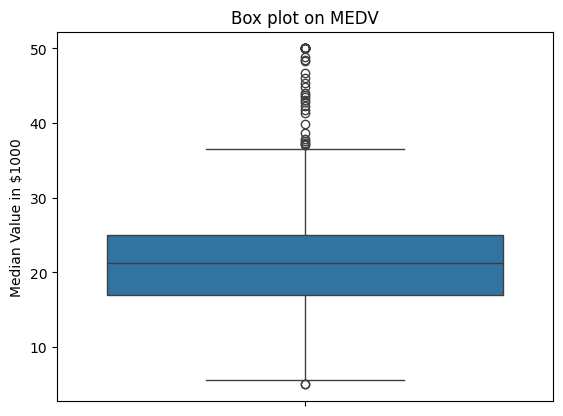

In [21]:
sns.boxplot(boston_df['MEDV']).set_title('Box plot on MEDV')
pyplot.ylabel('Median Value in $1000')
pyplot.show()

#### Observation (`all in 1000$`)
---
    Median  is close to 21, so half of the owner occupied house values are less than 21.
    The box plaot whisker starting point is at 5, indciates the minimum MEDV accross Boston is 5.
    It also says 25% of MEDV is less than 18
    75% of MEDV is close to 25
    Almost all MEDV (mostly 100%) lies under 38, although there are outliers.

    



### Provide a  bar plot for the Charles river variable

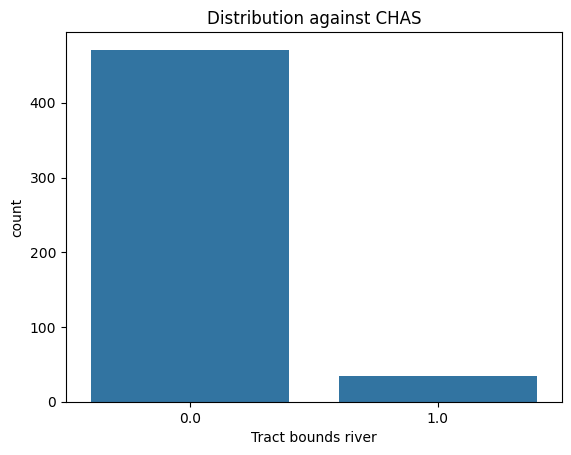

In [32]:
sns.countplot(x=boston_df['CHAS']).set_title('Distribution against CHAS')
pyplot.xlabel('Tract bounds river')
pyplot.show()

#### Observation
---
More than 480 house tracts are not river bound, around 20 odd hoses are river bound

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


In [35]:
boston_df['age group'] = pd.cut(boston_df['AGE'],bins=[0,35,70,110],labels=['35 years and younger',' between 35 and 70 years','70 years and older'])
sns.boxplot()

age group
70 years and older          287
 between 35 and 70 years    128
35 years and younger         91
Name: count, dtype: int64

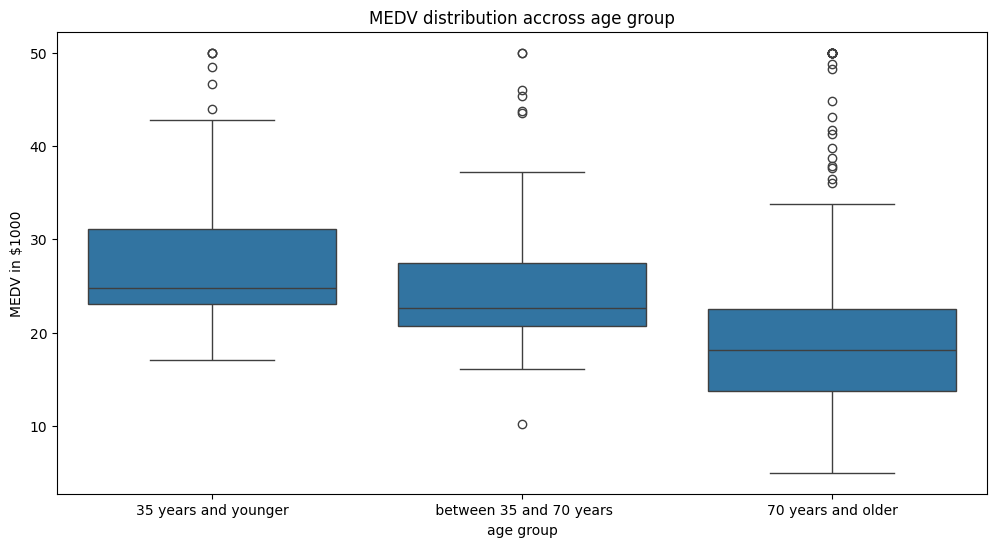

In [43]:
pyplot.figure(figsize=(12,6))
sns.boxplot(x= boston_df['age group'],y = boston_df['MEDV']).set_title('MEDV distribution accross age group')
pyplot.ylabel('MEDV in $1000')
pyplot.show()

#### Observation (MEDV in $1000)
---
    The newer the house is the higher is the median value.
    



### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


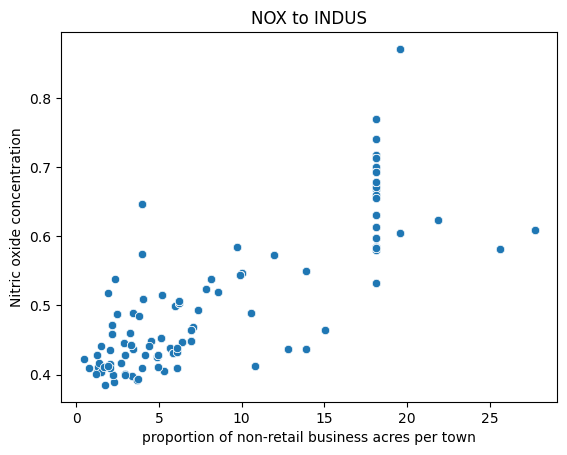

In [48]:
sns.scatterplot(x= boston_df['INDUS'],y=boston_df['NOX']).set_title('NOX to INDUS')
pyplot.xlabel('proportion of non-retail business acres per town')
pyplot.ylabel('Nitric oxide concentration')
pyplot.show()

#### Observation
---
    The scatterplot show a strong positive correlation between NOX and INDUS
    As non-retail business area increases nitric oxide concentration increaes proportionately, although the increament rate lower with higher proportion of non retail business.

### Create a histogram for the pupil to teacher ratio variable

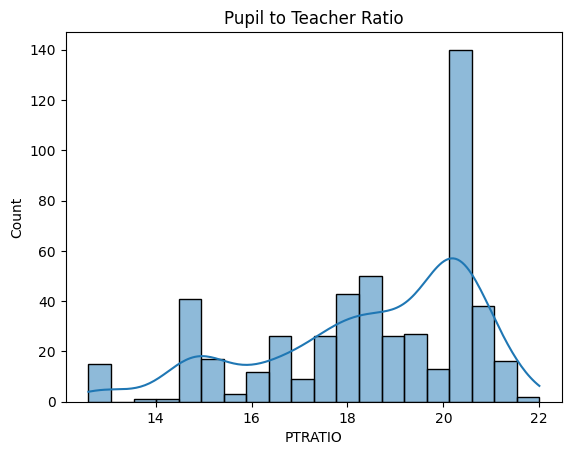

In [56]:
sns.histplot(x=boston_df['PTRATIO'],bins=20,kde=True).set_title('Pupil to Teacher Ratio')
pyplot.show()

#### Observation
---
    Pupil to Teacher Ratio is not normally distributed, rather it is right skwed. 
    The majority of the data is distributed between 18-20, with very few more than 20

## Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples
    Null Hypothesis - There is no significant difference in MEDV between houses bounded by Charles river or not
    Alternate Hypothesis - There is difference in MEDV between houses bounded by Charles river or not, and that is statistically significant
    α = 0.05
    Test performed = T-test for independent samples

In [70]:
from scipy import stats

bounded = boston_df[ boston_df['CHAS'] == 1]
Unbounded = boston_df[ boston_df['CHAS'] == 0]
bounded_MEDV = bounded['MEDV']
Unbounded_MEDV = Unbounded['MEDV']

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(bounded_MEDV, Unbounded_MEDV)
print(f'p_value {p_value}')
# Interpret the results:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between MEDV of bounded and unbounded houses.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between MEDV of bounded and unbounded houses.")


p_value 7.390623170519905e-05
Reject the null hypothesis; there is a significant difference between MEDV of bounded and unbounded houses.


### Q. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?
    Ans. As p-value is less than the significance level, we can conclude that this observation is not just by chance and statistically significant. Hence we can say there is a significant difference between MEDV of bounded and unbounded houses and we reject the null hypothesis

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
    Null Hypothesis - There is no significant difference in MEDV built prior to 1940 (AGE)
    Alternate Hypothesis - There is  significant difference in MEDV built prior to 1940 (AGE)
    α = 0.05
    Test performed = ANOVA

In [71]:
boston_df['age group'].value_counts()

age group
70 years and older          287
 between 35 and 70 years    128
35 years and younger         91
Name: count, dtype: int64

In [80]:
young = boston_df[ boston_df['age group'] == '35 years and younger']
middle = boston_df[ boston_df['age group'] == ' between 35 and 70 years']
old = boston_df[ boston_df['age group'] == '70 years and older']

# Perform ANOVA test
stat,pvalue = stats.f_oneway(young['MEDV'],middle['MEDV'],old['MEDV'])


# Interpret the results:
print(f'p_value {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between MEDV of at least of one group.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between MEDV accross age groups.")

p_value 7.390623170519905e-05
Reject the null hypothesis; there is a significant difference between MEDV of at least of one group.


#### Q. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
    Ans. Yes, there is significant difference of atleast one age group.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
    Null hypothesis - There is no relation between Nitric oxide concentrations and proportion of non-retail business acres per town
    Alternate hypothesis - There is significant corelation between Nitric oxide concentrations and proportion of non-retail business acres per town
    α = 0.05
    Test performed = Pearson Corelation

In [81]:
stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Q. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
    Ans. Since the p-value is leaa than the significance level we can conclude the strong corelation between NOX and INDUA and can reject the Null hypothsis.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
    Null hypothesis - There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
    Alternate hypothesis - There is significant impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
    α = 0.05
    Test performed = Linear Regression


In [87]:
y = boston_df['MEDV']
X = boston_df['DIS']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        11:25:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
    Ans. Since the p valu